In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] #classes are stored in list

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
classes[0]

'airplane'

In [ ]:
classes[y_train[0][0]]

'frog'

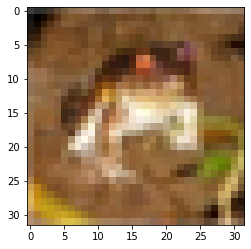

In [ ]:
#to show images
plt.imshow(X_train[0],) #to convert numbers into pixels

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes[6]

'frog'

In [ ]:
y_train_categorical = keras.utils.to_categorical(    #array into categorical
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid',strides=(1,1), activation='relu',input_shape=(32,32,3)), #convolution is to detect feature in images
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu',), #convolution is to detect feature in images
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(60,activation='relu'),
                          keras.layers.Dense(10, activation='softmax') #softmax normalizes probablity
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 3ms/step - loss: 1.7296 - accuracy: 0.3669
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1706 - accuracy: 0.5858
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0232 - accuracy: 0.6417
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9385 - accuracy: 0.6754
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8660 - accuracy: 0.7036
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8108 - accuracy: 0.7203
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7612 - accuracy: 0.7347
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7113 - accuracy: 0.7562
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6620 - accuracy: 0.7691
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.63

In [ ]:
'''
1. 0.45
2. 0.67  reults in case of sigmoid

(0.45/0.45+0.67)
(0.67/0.45+0.67) So if we sum their results equal to 1 in case of softmax
'''

'\n1. 0.45\n2. 0.67  reults in case of sigmoid\n\n(0.45/0.45+0.67)\n(0.67/0.45+0.67) So if we sum their results equal to 1 in case of softmax\n'

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.7487 - accuracy: 0.6615


[2.7486727237701416, 0.6614999771118164]

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([[2.98548176e-15, 1.85679730e-17, 1.27998801e-11, 9.70324218e-01,
        2.73030093e-14, 2.96754986e-02, 2.69964943e-07, 4.44904585e-17,
        3.93892731e-11, 1.44009117e-17],
       [1.11018856e-23, 1.14043821e-07, 1.22628772e-36, 2.91486071e-34,
        6.91780434e-35, 5.90314747e-38, 2.50735829e-33, 0.00000000e+00,
        9.99999881e-01, 5.13228815e-22],
       [1.21243671e-03, 3.75634083e-03, 2.98082337e-09, 3.13448361e-08,
        9.99539600e-12, 1.23339067e-12, 4.79991567e-12, 1.31426805e-06,
        9.89265323e-01, 5.76455519e-03],
       [9.99884844e-01, 6.63686640e-12, 1.14854454e-04, 6.88575474e-10,
        1.72633143e-08, 6.95294472e-17, 2.79668086e-07, 9.89439091e-16,
        5.44772394e-10, 4.44234984e-15],
       [5.25136869e-16, 2.89072377e-10, 4.73567247e-02, 1.73074841e-01,
        5.54769337e-01, 1.37185610e-10, 2.24799126e-01, 4.85221707e-18,
        5.54961765e-09, 1.89922922e-09]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=[np.argmax(element) for element in y_predict]
print('classification_report\n', classification_report(y_test, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.62      0.76      0.68      1000
           1       0.76      0.81      0.78      1000
           2       0.56      0.56      0.56      1000
           3       0.46      0.53      0.49      1000
           4       0.62      0.59      0.61      1000
           5       0.61      0.51      0.56      1000
           6       0.74      0.71      0.72      1000
           7       0.75      0.68      0.71      1000
           8       0.77      0.77      0.77      1000
           9       0.78      0.69      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

